# TEMA 3.1: Polynomial and Logistic Regression

In this notebook we will see how regression analysis can help to understand the data behavior, to predict data values (continuous or discrete), and to find important predictors (sparse models).

This notebook corresponds to Chapter 6 of the book **Introduction to Data Science, A Python Approch to Concepts, Techniques and Applications**, Laura Igual and Santi Seguí, Springer 2017

We present three different regression models: Multiple linear regression, Polynomial regression and Logistic regression. 

We evaluate the analysis results **qualitatively** by means of Seaborn visualization tools and **quantitatively** by means Scikit-learn library which provides validation measures and other toolboxes.
We use present three practical cases using real data:
* Practical case 1: Prediction of the Price of a New Housing Data Market
* Practical case 2: Winning or Losing Football Team


In [1]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})


import matplotlib.pylab as plt
import matplotlib.font_manager
%matplotlib inline 
#plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = True)
plt.rc('font', family = 'times')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

## Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

### Practical case 1: Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



To start with we load and visualize the data.

In [3]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston,y_boston = boston.data, boston.target
print ('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [4]:
print ('Keys:', boston.keys())
print ('Feature names:',boston.feature_names)
print (boston.DESCR)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - 

Text(0, 0.5, 'count')

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.
findfont: Font family ['times'] not found. Falling back to DejaVu Sans.


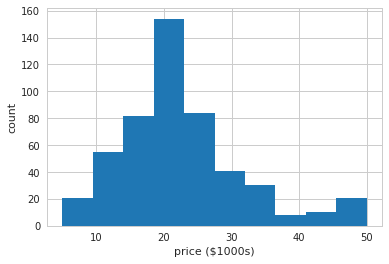

In [5]:
# Histogram of prices:
plt.rcParams["text.usetex"] = False
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

### Visualizations

We first consider the task of predicting median house values in the Boston area using as the predictor one of the attributes, for instance, LSTAT, defined as the "proportion of lower status of the population".

Seaborn visualization can be used to show this linear relationships easily:

In [ ]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target
sns.lmplot("PRICE", "LSTAT", df_boston, size = 4, aspect = 2);
plt.savefig("data/lmplotBostonLSTAT.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
# Visualization of the relations between price and RM
sns.lmplot("PRICE","RM", df_boston, size = 4, aspect = 2);

In [ ]:
# Visualization of the relations between price and CRIM
sns.lmplot("PRICE", "CRIM", df_boston, size = 4, aspect = 2);

In [ ]:
sns.lmplot("PRICE", "LSTAT", df_boston, order = 2, size = 4, aspect = 2);
plt.savefig("data/lmplotBostonLSTAT_order2.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
sns.lmplot("PRICE", "LSTAT", df_boston, order = 3, size = 4, aspect = 2);
plt.savefig("data/lmplotBostonLSTATorder3.png", dpi = 300, bbox_inches = 'tight')

### Heatmap

We can also use corrplot function for plotting a diagonal correlation matrix.

In [ ]:
# Draw a heatmap 
indexes = [0, 2, 4, 5, 6, 12] #To plot just some of the variables
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['price'] = boston.target
corrmat = df2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .8, square = True)
plt.savefig("data/corrplot.png", dpi = 300, bbox_inches = 'tight')


Using correlaton matrix heatmap we can observe that "RM" and "LSTAT" are the variables more correlated with "Price".

### Scatter plot

Let's explore multiple variables with scatter plot
The scatter plot of Pandas is a grid of plots of multiple varaibles one against the other, showing the relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables (LSTAT, AGE, RM):

In [ ]:
print (boston.feature_names)
indexes = [5, 6, 12] # 3 of the 13 variables: LSTAT, AGE, RM.
print (boston.feature_names[indexes])

In [ ]:
indexes = [5, 6, 12]
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['PRICE'] = boston.target
pd.plotting.scatter_matrix(df2, figsize = (9.0, 9.0))  
plt.savefig("data/scatterplotBoston.png", dpi = 300, bbox_inches = 'tight')

### Predictions

Let's make predictions. Evaluation on new samples using Scikit-learn.
We will split the data into training set and test set:

In [ ]:
from sklearn import linear_model

train_size = X_boston.shape[0]//2
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print ('Training and testing set sizes', X_train.shape, X_test.shape)
regr_boston = linear_model.LinearRegression()
regr_boston.fit(X_train, y_train) 
print ('\nCoefs (per dim) ', regr_boston.coef_, ' and intercept: ', regr_boston.intercept_)
print (boston.feature_names)
# Best possible score is 1.0, lower values (even negatives!!) are worse.
print ('\nTraining Score:', regr_boston.score(X_train, y_train) )
print ('Testing Score:', regr_boston.score(X_test, y_test) )
print ('\nTraining MSE: ', np.mean((regr_boston.predict(X_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_boston.predict(X_test) - y_test)**2))

We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.
Next, we try to build a sparse model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients.

## Sparse models

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as *LASSO* (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.


In [ ]:
# Create a Lasso regressor
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(X_train, y_train) 
print ('Coeffs (per dim): ', regr_lasso.coef_, 'and intercept:', regr_lasso.intercept_)
print (boston.feature_names)
# Are the coeficients now sparse?
print ('\nTraining Score:', regr_lasso.score(X_train, y_train)) 
print ('Testing Score:', regr_lasso.score(X_test, y_test)) 
# Is the score almost the same?
print ('\nTraining MSE: ', np.mean((regr_lasso.predict(X_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_lasso.predict(X_test) - y_test)**2))

It can now be seen that the result of the model fitting for a set of sparse coefficients is much better than before (using all the variables), with the testing score increasing from -2.24 to 0.5. This demonstrates that four of the initial variables are not important for the prediction and in fact they confuse the regressor.

In [ ]:
print (boston.data.shape)
print (boston.target.shape)
print (boston.feature_names)
print ("max, min and mean:", np.max(boston.target), np.min(boston.target), np.mean(boston.target))

In [ ]:
indexes_non_selected = [0, 2, 3, 4]
print ('Non important variable:', boston.feature_names[indexes_non_selected])
most_important_index=[5]
print ('Most important variable:', boston.feature_names[most_important_index])

In [ ]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print ('Order variable (from less to more important):', boston.feature_names[ind])

We can select the most important features with sklearn:

In [ ]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)
selector.fit_transform(X_train, y_train)
print ('Selected features (T/F):', selector.get_support(), '\nSelected features (Name):', boston.feature_names) # Show the selected features

The set of selected features is now different, since the criterion has changed. However, three of the most important features are among them: 'RM', 'PTRATIO' and 'LSTAT'.

Let's evaluate the predictions.

In [ ]:
# Visualization of target and predicted responses
clf = linear_model.LinearRegression()
clf.fit(boston.data, boston.target)
predicted = clf.predict(boston.data)
plt.scatter(boston.target, predicted, alpha = 0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.savefig("data/relationTruePredictedPrices.png", dpi = 300, bbox_inches = 'tight')

The model seem to be a good fitting except for the more expensive houses.

Model evaluation:

In [ ]:
clf.score(boston.data, boston.target)  # Best possible score is 1.0, lower values are worse.

In [ ]:
# Score using a single feature
regr_feat1 = linear_model.LinearRegression()
for i in np.arange(13):
    feat1 = X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print ('Feature:', boston.feature_names[i])
    print ('Score:', regr_feat1.score(feat1, y_train)) 

## Logistic Regresion (Scikit-learn)

**Logistic regression** or logit regression is a type of probabilistic statistical classification model. It is also used to predict a binary response from a binary predictor, used for predicting the outcome of a categorical dependent variable (i.e., a class label) based on one or more predictor variables (features). 

(Source: *Wikipedia*)

The logistic function is:

$$ f(x) = \frac{1}{1+e^{- \lambda x}}$$

The logistic function is useful because it can take an input with any value from negative infinity to positive infinity, whereas the output  is confined to values between 0 and 1 and hence is interpretable as a probability.

In [ ]:
def logist(x,l):
    return 1/(1+np.exp(-l*x))

x = np.linspace(-10, 10) # 50 points equally spaced from -10 to 10
t = logist(x, 0.5)
y = logist(x, 1)
z = logist(x, 3)
plt.plot(x, t, label = 'lambda=0.5')
plt.plot(x, y, label = 'lambda=1')
plt.plot(x, z, label = 'lambda=3')
plt.legend(loc = 'upper left')
plt.savefig("data/LogisticRegression.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
def lr_model(x):
    return 1 / (1 + np.exp(-x))

xmin, xmax = -10, 10
np.random.seed(0)
X = np.random.normal(size = 100) 

y = (X > 0).astype(np.float) 
X = X[:, np.newaxis] 

# Linear Regression:
ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

plt.axhline(0.5, color = 'black')

plt.scatter(X, y, color = 'black')

plt.ylim(-1, 2)
plt.xlim(-3, 3)

plt.ylabel('y')
plt.xlabel('x')

In [ ]:
# Logistic Regression:
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# Drawing:
X_test = np.linspace(-10, 10, 300)
loss = lr_model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color = 'red', linewidth = 2)

plt.axhline(0.5, color = 'black')

plt.scatter(X, y, color = 'black')

plt.ylim(-1, 2)
plt.xlim(-3, 3)

plt.ylabel('y')
plt.xlabel('x')

plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, color = 'blue', linewidth = 2)

plt.savefig("data/LinearvsLR.png", dpi = 300, bbox_inches = 'tight')

### Practical case 2: Winning or Losing Football Team

We want to predict victory or defeat in a football match when we are given the number of goals a team scores.
To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it. We follow the steps:
+ Read this file in a pandas DataFrame: http://www.football-data.co.uk/mmz4281/1213/SP1.csv
+ Select these columns in a new DataFrame: 'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. (FTHG: Home team goals, FTAG: Away team goals, FTR: H=Home Win, D=Draw, A=Away Win)
+ Visualize a scatter plot of FTHG versus FTAG.
+ Built a $X$ 1-d predictor with all scores and a $y$ binary variable indicating win or loss.
+ Compute and visualize a logistic regression. 
+ Which is the cut value?

In [ ]:
# Season 2012/2013
file = 'data/SP1.csv' # file = 'http://www.football-data.co.uk/mmz4281/1213/SP1.csv'
data_football = pd.read_csv(file)
s = data_football[['HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR']]

In [ ]:
s.head() # (H=Home Win, D=Draw, A=Away Win)

Can we predict if we have a win or loss if we are given a score?

In [ ]:
# Visualization with scatter the number of goals
plt.scatter(s.FTHG, s.FTAG, s = 100, alpha = 0.05) 
# s, size of the points, alpha, blending value, between 0 (transparent) and 1 (opaque).
plt.xlabel('Home team goals (FTHG)')
plt.ylabel('Away team goals (FTAG)')

In [ ]:
# Create two extra columns containing 'W' the number of goals of the winner and 'L' the number of goals of the losser
def my_f1(row):
    return max(row['FTHG'], row['FTAG'])

def my_f2(row):
    return min(row['FTHG'], row['FTAG'])

# Add 2 new columns to the panda:
s['W'] = s.apply(my_f1, axis = 1)
s['L'] = s.apply(my_f2, axis = 1)


In [ ]:
s.head()

In [ ]:
# Create the data and target
import numpy as np
x1 = s['W'].values 
y1 = np.ones(len(x1), dtype = np.int)
x2 = s['L'].values 
y2 = np.zeros(len(x2), dtype = np.int)

x = np.concatenate([x1, x2])
x = x[:, np.newaxis]
y = np.concatenate([y1, y2])


In [ ]:
# Plot the data 
plt.scatter(x, y, s = 100, alpha = 0.03)
plt.xlabel('Number of goals')
plt.ylabel('Win (1) or loss (0)')
plt.savefig("data/scatterLossWin.png", dpi = 300, bbox_inches = 'tight')

In [ ]:
# Fitting of a Logistic Regression and prediction using the model:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y)

X_test = np.linspace(-5, 10, 300)

loss = lr_model(X_test * logreg.coef_ + logreg.intercept_).ravel()

X_test2 = X_test[:, np.newaxis]
losspred = logreg.predict(X_test2)

plt.scatter(x.ravel(), y, color = 'black', s = 100, zorder = 20, alpha = 0.03)
plt.plot(X_test, loss, color = 'blue', linewidth = 3)
plt.plot(X_test, losspred, color = 'red', linewidth = 3)
plt.xlabel('Number of goals')
plt.ylabel('Victory (1) or Defeat (0)')
plt.savefig("data/logregPrediction.png", dpi = 300, bbox_inches = 'tight')

With this information we can estimate that the cut off value is 1. This means that a team has to score more than one goal to win.